In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [2]:
ruta="./Datos/"
train=os.listdir(ruta)[1]
df=pd.read_csv(ruta+train)

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df.describe(include="all")

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
import seaborn as sns
Flag=[x for x in df.columns if "FLAG" in x]

<AxesSubplot:>

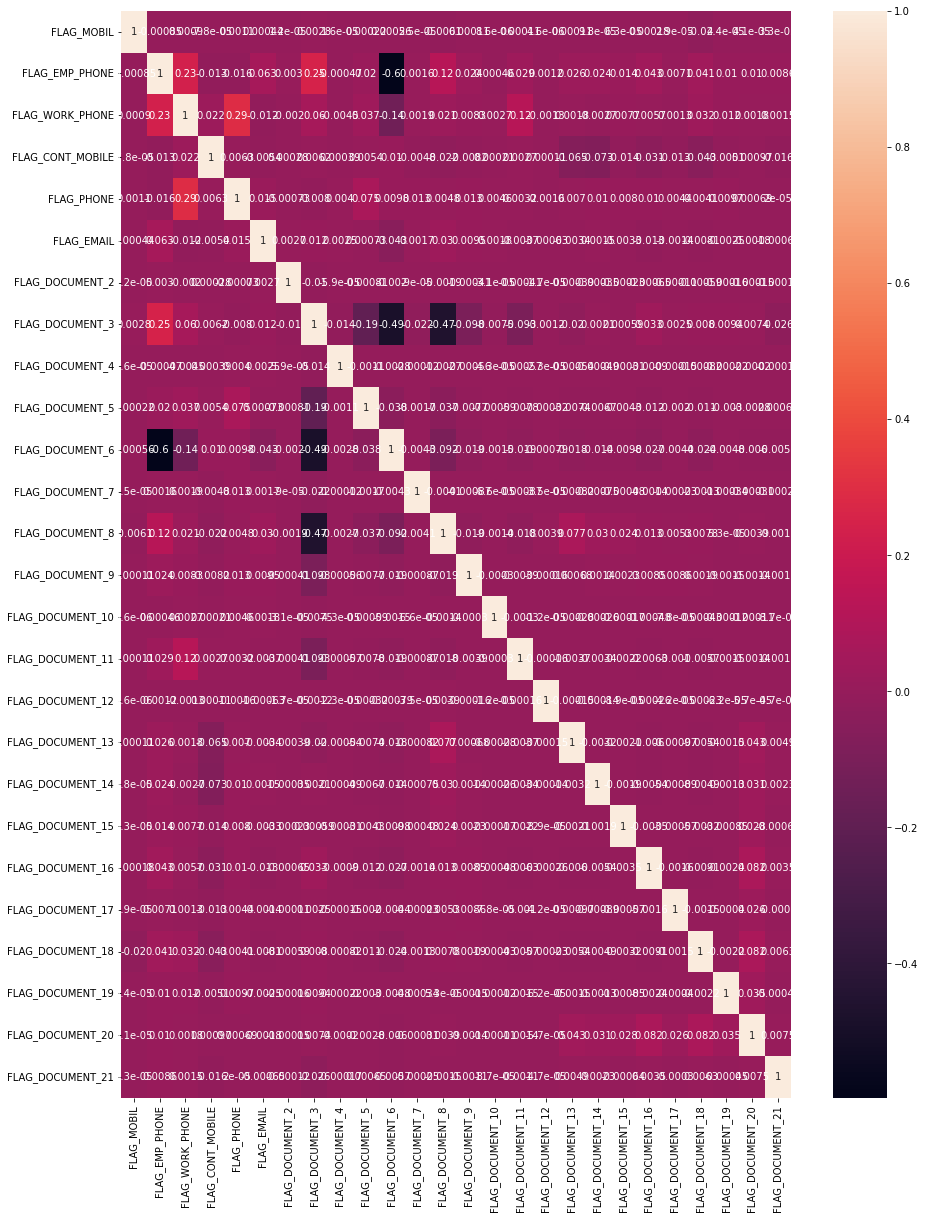

In [6]:
plt.figure(figsize=(15,20))
cor_matrix=df[Flag].corr()
sns.heatmap(cor_matrix,annot=True)

In [7]:
No_Flag=[x for x in df.columns if "FLAG" not in x]

<AxesSubplot:>

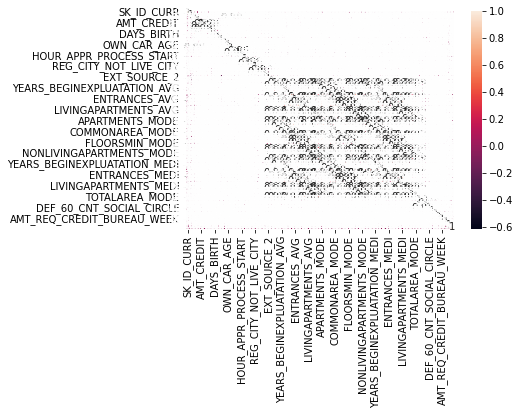

In [8]:
cor_matrix=df[No_Flag].select_dtypes(include="number").corr()
sns.heatmap(cor_matrix,annot=True)

Pasos a seguir:
* Calcularemos los diferentes valores que tienen las variables objeto.
* Las variables objeto utilizaremos un getdummies escogiedno solo el top5.
* Los valores nulos los imputaremos mediante arbol de decisión haciendo antes un KMEANS.
* Tendremos que balancear la target si queremos entrenar ya que el 8% es uno.
* Una vez imputados haremos cluster para predecir.
* Utilizaremos el arbol de decisión haciendo un gridsearchv.
* Utilizaremos application_Test para predecir.

In [9]:
for i in df.select_dtypes(include="object").columns:
    print(f"La variable {i} tiene estos valores únicos {df[i].nunique()}")

La variable NAME_CONTRACT_TYPE tiene estos valores únicos 2
La variable CODE_GENDER tiene estos valores únicos 3
La variable FLAG_OWN_CAR tiene estos valores únicos 2
La variable FLAG_OWN_REALTY tiene estos valores únicos 2
La variable NAME_TYPE_SUITE tiene estos valores únicos 7
La variable NAME_INCOME_TYPE tiene estos valores únicos 8
La variable NAME_EDUCATION_TYPE tiene estos valores únicos 5
La variable NAME_FAMILY_STATUS tiene estos valores únicos 6
La variable NAME_HOUSING_TYPE tiene estos valores únicos 6
La variable OCCUPATION_TYPE tiene estos valores únicos 18
La variable WEEKDAY_APPR_PROCESS_START tiene estos valores únicos 7
La variable ORGANIZATION_TYPE tiene estos valores únicos 58
La variable FONDKAPREMONT_MODE tiene estos valores únicos 4
La variable HOUSETYPE_MODE tiene estos valores únicos 3
La variable WALLSMATERIAL_MODE tiene estos valores únicos 7
La variable EMERGENCYSTATE_MODE tiene estos valores únicos 2


Observamos la variable que más diferentes valores unicos tiene

In [10]:
sorted(df["ORGANIZATION_TYPE"].unique())

['Advertising',
 'Agriculture',
 'Bank',
 'Business Entity Type 1',
 'Business Entity Type 2',
 'Business Entity Type 3',
 'Cleaning',
 'Construction',
 'Culture',
 'Electricity',
 'Emergency',
 'Government',
 'Hotel',
 'Housing',
 'Industry: type 1',
 'Industry: type 10',
 'Industry: type 11',
 'Industry: type 12',
 'Industry: type 13',
 'Industry: type 2',
 'Industry: type 3',
 'Industry: type 4',
 'Industry: type 5',
 'Industry: type 6',
 'Industry: type 7',
 'Industry: type 8',
 'Industry: type 9',
 'Insurance',
 'Kindergarten',
 'Legal Services',
 'Medicine',
 'Military',
 'Mobile',
 'Other',
 'Police',
 'Postal',
 'Realtor',
 'Religion',
 'Restaurant',
 'School',
 'Security',
 'Security Ministries',
 'Self-employed',
 'Services',
 'Telecom',
 'Trade: type 1',
 'Trade: type 2',
 'Trade: type 3',
 'Trade: type 4',
 'Trade: type 5',
 'Trade: type 6',
 'Trade: type 7',
 'Transport: type 1',
 'Transport: type 2',
 'Transport: type 3',
 'Transport: type 4',
 'University',
 'XNA']

Extraeremos hasta el espacio de cada una y eliminamos cosas que sobren

In [11]:
df["ORGANIZATION_TYPE"]=df["ORGANIZATION_TYPE"].str.split().str[0].str.replace(":", "")

## Pareto
* Se Creará un diccionario para aplicar la regla de pareto

In [12]:
for col in df.select_dtypes(include="object").columns:
    print("="*20)
    print(f"La columna es {col}")
    display(pd.DataFrame(df[col].value_counts(normalize=True).cumsum()))

La columna es NAME_CONTRACT_TYPE


,NAME_CONTRACT_TYPE
Cash loans,0.904787
Revolving loans,1.000000


La columna es CODE_GENDER


,CODE_GENDER
F,0.658344
M,0.999987
XNA,1.000000


La columna es FLAG_OWN_CAR


,FLAG_OWN_CAR
N,0.659892
Y,1.000000


La columna es FLAG_OWN_REALTY


,FLAG_OWN_REALTY
Y,0.693673
N,1.000000


La columna es NAME_TYPE_SUITE


,NAME_TYPE_SUITE
Unaccompanied,0.811596
Family,0.942708
"Spouse, partner",0.979838
Children,0.990507
Other_B,0.996287
Other_A,0.999115
Group of people,1.000000


La columna es NAME_INCOME_TYPE


,NAME_INCOME_TYPE
Working,0.516320
Commercial associate,0.749212
Pensioner,0.929245
State servant,0.999821
Unemployed,0.999893
Student,0.999951
Businessman,0.999984
Maternity leave,1.000000


La columna es NAME_EDUCATION_TYPE


,NAME_EDUCATION_TYPE
Secondary / secondary special,0.710189
Higher education,0.953637
Incomplete higher,0.987057
Lower secondary,0.999467
Academic degree,1.000000


La columna es NAME_FAMILY_STATUS


,NAME_FAMILY_STATUS
Married,0.638780
Single / not married,0.786560
Civil marriage,0.883386
Separated,0.947677
Widow,0.999993
Unknown,1.000000


La columna es NAME_HOUSING_TYPE


,NAME_HOUSING_TYPE
House / apartment,0.887344
With parents,0.935602
Municipal apartment,0.971968
Rented apartment,0.987841
Office apartment,0.996351
Co-op apartment,1.000000


La columna es OCCUPATION_TYPE


,OCCUPATION_TYPE
Laborers,0.261396
Sales staff,0.413452
Core staff,0.544041
Managers,0.645268
Drivers,0.733384
High skill tech staff,0.787287
Accountants,0.833768
Medicine staff,0.874204
Security staff,0.906039
Cooking staff,0.934203


La columna es WEEKDAY_APPR_PROCESS_START


,WEEKDAY_APPR_PROCESS_START
TUESDAY,0.175282
WEDNESDAY,0.344167
MONDAY,0.509084
THURSDAY,0.673602
FRIDAY,0.837297
SATURDAY,0.947381
SUNDAY,1.000000


La columna es ORGANIZATION_TYPE


,ORGANIZATION_TYPE
Business,0.274881
XNA,0.454953
Self-employed,0.579865
Other,0.634117
Trade,0.680668
Industry,0.727207
Medicine,0.763605
Government,0.797438
Transport,0.826673
School,0.855592


La columna es FONDKAPREMONT_MODE


,FONDKAPREMONT_MODE
reg oper account,0.759443
reg oper spec account,0.883702
not specified,0.942201
org spec account,1.000000


La columna es HOUSETYPE_MODE


,HOUSETYPE_MODE
block of flats,0.982306
specific housing,0.992089
terraced house,1.000000


La columna es WALLSMATERIAL_MODE


,WALLSMATERIAL_MODE
Panel,0.436859
"Stone, brick",0.865615
Block,0.926824
Wooden,0.962294
Mixed,0.977482
Monolithic,0.989251
Others,1.000000


La columna es EMERGENCYSTATE_MODE


,EMERGENCYSTATE_MODE
No,0.985608
Yes,1.000000


* En este ejercicio se pondrá un umbral del 90% y se sumará una posición por si acaso se le sumará una posición
* Se aplciará a aquellas  variables uqe superen las siete categoriás diferentes

In [15]:
Diccionario={}
# col="ORGANIZATION_TYPE"
for col in df.select_dtypes(include="object").columns:
    if df[col].nunique()>7:
        ss=pd.DataFrame(df[col].value_counts(normalize=True).cumsum())
        Diccionario[col]=list(ss[:len(ss[ss[col]<=0.9])+1].index)

In [16]:
Diccionario

{'NAME_INCOME_TYPE': ['Working', 'Commercial associate', 'Pensioner'],
 'OCCUPATION_TYPE': ['Laborers',
  'Sales staff',
  'Core staff',
  'Managers',
  'Drivers',
  'High skill tech staff',
  'Accountants',
  'Medicine staff',
  'Security staff'],
 'ORGANIZATION_TYPE': ['Business',
  'XNA',
  'Self-employed',
  'Other',
  'Trade',
  'Industry',
  'Medicine',
  'Government',
  'Transport',
  'School',
  'Kindergarten',
  'Construction',
  'Security']}

* Se detecta que XNA son valores nulos por lo que se deben sustuir

In [17]:
df=df.replace('XNA',np.nan)

In [18]:
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          4
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

Se ve variable como ``OWN_CAR_AGE`` que se deberá estudiar pq tiene 202929 valores nuloes.

In [19]:
df["OWN_CAR_AGE"].describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

Esta variable puede ser muy controvertida ya que nos falta información.
Por ello crearemos una variable de control de si tiene nan le daremos un 1 y sino un cero y lo compararemos con la target

In [20]:
df["Flag_OWN_CAR_AGE"]=np.where(df["OWN_CAR_AGE"].isnull(),1,0)

In [21]:
pd.crosstab(df["Flag_OWN_CAR_AGE"],df["TARGET"],margins=True,normalize=True)

TARGET,0,1,All
Flag_OWN_CAR_AGE,,,
0,0.315455,0.024637,0.340092
1,0.603816,0.056092,0.659908
All,0.919271,0.080729,1.000000


El 5% de las personas que no tienen coche propio tienen un target como uno.
Al estar desbalaceado la muestra a la edad del coche se le pondrá un valor alto ``999`` por si creamos un KMEANS y un modelo de ML Supervisado lo detecte en otro grupo

In [22]:
df["OWN_CAR_AGE"].fillna(999,inplace=True)

In [23]:
df.isnull().sum().sort_values(ascending=False)


COMMONAREA_MODE                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MEDI                 214865
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
YEARS_BUILD_MODE                204488
LANDAREA_AVG                    182590
LANDAREA_MODE                   182590
LANDAREA_MEDI                   182590
BASEMENTAREA_MODE               179943
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_AVG               169682
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_MEDI       

Para hacer diferentes imputaciones haremos lo siguiente.
* Los registros que tengan menos del 5% de valores nulos lo imputaremos a la moda **por si acaso es una variable categorica** o mediana por si fuera una variable ordinal
* Los registros que tengan más del 5% y menos del 40% de valores nulos lo imputaremos mediante un arbol de decisión.
* Los registros que superen el 40% e inferior al 60% haremos KMEANS entre 2 y 4 cluster y un arbol de decisión.
* Los registros que superen el 60% serán eliminados

In [24]:
Imputaciones=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df)).reset_index()
Imputaciones.columns=["Columnas","Porcentaje"]

In [25]:
Eliminar=Imputaciones[Imputaciones["Porcentaje"]>=0.5]["Columnas"].values
Mediana=Imputaciones[Imputaciones["Porcentaje"]<0.05]["Columnas"].values
Variables_Arboles=Imputaciones[(Imputaciones["Porcentaje"]>=0.05) & (Imputaciones["Porcentaje"]<0.4)]["Columnas"].values
Variables_Karbol=Imputaciones[(Imputaciones["Porcentaje"]>=0.4) & (Imputaciones["Porcentaje"]<0.5)]["Columnas"].values

### Eliminadas

In [26]:
df=df.drop(columns=Eliminar)

### Imputadas a la mediana

In [27]:
import scipy.stats as ss

In [28]:
for col in Mediana:
    if df[col].dtypes=='O':
        relleno=df[col].value_counts().index[0]
        df[col]=df[col].fillna(relleno)
    elif df[col].dtypes=='int64':
         df[col]=df[col].fillna(np.median(df[col]))
    else:
        df[col]=df[col].fillna((df[col].mean()))

In [29]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df)).reset_index()

,index,0
0,LANDAREA_MODE,0.593767
1,LANDAREA_AVG,0.593767
2,LANDAREA_MEDI,0.593767
3,BASEMENTAREA_MEDI,0.585160
4,BASEMENTAREA_MODE,0.585160
5,BASEMENTAREA_AVG,0.585160
6,EXT_SOURCE_1,0.563811
7,NONLIVINGAREA_MODE,0.551792
8,NONLIVINGAREA_AVG,0.551792
9,NONLIVINGAREA_MEDI,0.551792


## Arbol de Decisión

Ahora viene el paso de hacer arboles de decisión
* Los que sean valores enteros lo consideraremos de clasificación
* los valores flotantes como de regresión

In [30]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

Dos opciones que tenemos aqui como en el siguiente apartado:
1. Que las que se han entrenado y predicho entren para predecir la siguiente
2. Que se entrenen solo con las que no tienen nulos hasta este punto y se predice cada una.

```para esta solución optamos por la segunda```

Además aquellas variables que sean objeto no la utilizaremos para entrenar, para así evitarnos utilziar el labeleconder y asi evitar si una variable no ha sido vista por el label enconer no tenga problemas

In [31]:
Variables_Entrenamiento_Posibles=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df)).reset_index()
Variables_Entrenamiento_Posibles.columns=["Columnas","Porcentaje"]
Variables_Entrenamiento_Posibles=Variables_Entrenamiento_Posibles[Variables_Entrenamiento_Posibles["Porcentaje"]==0.0]["Columnas"].values

In [32]:
Variables_Entrenamiento=df[Variables_Entrenamiento_Posibles].select_dtypes(exclude="object").columns

In [33]:
for Variables_Arbol in Variables_Arboles:
    df_arbol=df[list(Variables_Entrenamiento)+[Variables_Arbol]]
    df_arbol_train=df_arbol[~df_arbol[Variables_Arbol].isnull()]
    df_arbol_test=df_arbol[df_arbol[Variables_Arbol].isnull()]
    if df_arbol[Variables_Arbol].dtypes not in ['float32','float64']:
        Modelo_C=DecisionTreeClassifier()
        print("no es flotante")
        if df_arbol[Variables_Arbol].dtypes=='O':
            print("La variable a predecir es tipo objeto")
            Encodar=LabelEncoder()
            df_arbol_train[Variables_Arbol]=Encodar.fit_transform(df_arbol_train[Variables_Arbol])
            print("termina el encoder")
        Modelo_C.fit(df_arbol_train[list(Variables_Entrenamiento)],df_arbol_train[Variables_Arbol])
        df_arbol_test[Variables_Arbol]=Modelo_C.predict(df_arbol_test[list(Variables_Entrenamiento)])
        if df_arbol[Variables_Arbol].dtypes=='O':
            df_arbol_train[Variables_Arbol]=Encodar.inverse_transform(df_arbol_train[Variables_Arbol])
            df_arbol_test[Variables_Arbol]=Encodar.inverse_transform(df_arbol_test[Variables_Arbol])
        df_conjunto=pd.concat([df_arbol_train,df_arbol_test]).sort_index()
        df[Variables_Arbol]=df_conjunto[Variables_Arbol]

    else:
        Modelo_R=DecisionTreeRegressor()
        print("no es flotante")
        if df_arbol_train[Variables_Arbol].dtypes=='O':
            print("Es tipo objeto")
            for columna in df_arbol_train.columns:
                if df_arbol_train[columna].dtypes=='O':
                    Encodar=LabelEncoder()
                    df_arbol_train[columna]=Encodar.fit_transform(df_arbol_train[columna])
                print("termina el encoder")
        Modelo_R.fit(df_arbol_train[list(Variables_Entrenamiento)],df_arbol_train[Variables_Arbol])
        df_arbol_test[Variables_Arbol]=Modelo_R.predict(df_arbol_test[list(Variables_Entrenamiento)])
        df_conjunto=pd.concat([df_arbol_train,df_arbol_test]).sort_index()
        df[Variables_Arbol]=df_conjunto[Variables_Arbol]

no es flotante
La variable a predecir es tipo objeto


C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_13732\1168305884.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arbol_train[Variables_Arbol]=Encodar.fit_transform(df_arbol_train[Variables_Arbol])


termina el encoder


C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_13732\1168305884.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arbol_test[Variables_Arbol]=Modelo_C.predict(df_arbol_test[list(Variables_Entrenamiento)])
C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_13732\1168305884.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arbol_train[Variables_Arbol]=Encodar.inverse_transform(df_arbol_train[Variables_Arbol])
C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_13732\1168305884.py:17: Setting

no es flotante


C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_13732\1168305884.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arbol_test[Variables_Arbol]=Modelo_R.predict(df_arbol_test[list(Variables_Entrenamiento)])


no es flotante
La variable a predecir es tipo objeto


C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_13732\1168305884.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arbol_train[Variables_Arbol]=Encodar.fit_transform(df_arbol_train[Variables_Arbol])


termina el encoder


C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_13732\1168305884.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arbol_test[Variables_Arbol]=Modelo_C.predict(df_arbol_test[list(Variables_Entrenamiento)])
C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_13732\1168305884.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arbol_train[Variables_Arbol]=Encodar.inverse_transform(df_arbol_train[Variables_Arbol])
C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_13732\1168305884.py:17: Setting

no es flotante


C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_13732\1168305884.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arbol_test[Variables_Arbol]=Modelo_R.predict(df_arbol_test[list(Variables_Entrenamiento)])


no es flotante


C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_13732\1168305884.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arbol_test[Variables_Arbol]=Modelo_R.predict(df_arbol_test[list(Variables_Entrenamiento)])


no es flotante


C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_13732\1168305884.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arbol_test[Variables_Arbol]=Modelo_R.predict(df_arbol_test[list(Variables_Entrenamiento)])


no es flotante


C:\Users\Daniel Montes\AppData\Local\Temp\ipykernel_13732\1168305884.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arbol_test[Variables_Arbol]=Modelo_R.predict(df_arbol_test[list(Variables_Entrenamiento)])


no es flotante


KeyboardInterrupt: 